In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [42]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [43]:
df =pd.read_csv('loan.csv')

C:\Users\U385998\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
df.shape

(39717, 111)

### Data Exploration and Cleaning

In this section we are:

1. Cleaning the data based on null values
2. Converting the data types of the features as per relevance
3. Imputing Null Values
4. Outlier detection and treatment

In [45]:
### Checking null values
nulls =df.isnull().sum()
nulls

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [46]:
## A lot of columns are completely null, removing such columns

null_cols =list(nulls[nulls == len(df)].index)
not_null_cols =[i for i in df.columns if i not in null_cols]
df =df[not_null_cols]

#### Analyzing Categorical Columns

In [47]:
cat_cols =[i for i in df.columns if df[i].dtype =='object']

In [48]:
## Getting the count of unique values for the categorical columns
cat_cols_nunique= {i: df[i].nunique() for i in cat_cols}
cat_cols_nunique

{'term': 2,
 'int_rate': 371,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28820,
 'emp_length': 11,
 'home_ownership': 5,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 3,
 'pymnt_plan': 1,
 'url': 39717,
 'desc': 26527,
 'purpose': 14,
 'title': 19615,
 'zip_code': 823,
 'addr_state': 50,
 'earliest_cr_line': 526,
 'revol_util': 1089,
 'initial_list_status': 1,
 'last_pymnt_d': 101,
 'next_pymnt_d': 2,
 'last_credit_pull_d': 106,
 'application_type': 1}

In [49]:
# Removing columns with only one cardinal value 
df.drop(columns =['pymnt_plan','initial_list_status','application_type'], inplace=True)

# Removing columns with very high cardinality
df.drop(columns =['emp_title','url','title','desc','zip_code','next_pymnt_d'], inplace =True)

In [50]:
df.shape

(39717, 48)

In [51]:
# Data Type processing 

# Converting Interest rate and revol_util to float values
df['int_rate'] =df['int_rate'].str.replace("%",'').astype('float')
df['revol_util'] =df['revol_util'].str.replace("%",'').astype('float')

# # Converting object date columns to date
df['issue_d'] =pd.to_datetime(df['issue_d'],format='%b-%y')
df['last_pymnt_d'] =pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

# Converting Term to int
df['term']=df['term'].str.replace(' months', '').astype('int')

In [ ]:
# Need to take care while converting earliest credit line to date can add here

### Analyzing Continous Variables

In [61]:
cont_cols =[i for i in df.columns if (df[i].dtype == 'int64' or df[i].dtype =='float64') ]

In [62]:
df[cont_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,14035.000,2786.000,39717.000,39717.000,39717.000,39667.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39020.000
mean,11219.444,10947.713,10397.449,12.021,324.562,68968.926,13.315,0.147,0.869,35.901,69.698,9.294,0.055,13382.528,48.832,22.089,51.228,50.990,12153.597,11567.149,9793.349,2263.663,1.363,95.222,12.406,2678.826,0.043
std,7456.671,7187.239,7128.450,3.725,208.875,63793.766,6.679,0.492,1.070,22.020,43.823,4.400,0.237,15885.017,28.333,11.402,375.173,373.824,9042.041,8942.673,7065.522,2608.112,7.290,688.745,148.672,4447.136,0.204
min,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5500.000,5400.000,5000.000,9.250,167.020,40404.000,8.170,0.000,0.000,18.000,22.000,6.000,0.000,3703.000,25.400,13.000,0.000,0.000,5576.930,5112.310,4600.000,662.180,0.000,0.000,0.000,218.680,0.000
50%,10000.000,9600.000,8975.000,11.860,280.220,59000.000,13.400,0.000,1.000,34.000,90.000,9.000,0.000,8850.000,49.300,20.000,0.000,0.000,9899.640,9287.150,8000.000,1348.910,0.000,0.000,0.000,546.140,0.000
75%,15000.000,15000.000,14400.000,14.590,430.780,82300.000,18.600,0.000,1.000,52.000,104.000,12.000,0.000,17058.000,72.400,29.000,0.000,0.000,16534.433,15798.810,13653.260,2833.400,0.000,0.000,0.000,3293.160,0.000
max,35000.000,35000.000,35000.000,24.590,1305.190,6000000.000,29.990,11.000,8.000,120.000,129.000,44.000,4.000,149588.000,99.900,90.000,6311.470,6307.370,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


In [56]:
# Removing continous variables that have only 0 values and ids 

df.drop(columns=['id','member_id','policy_code','acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True)

In [68]:
# Removing variables which can be calculated only post charge off
# Cannot use these variables proactively

df.drop(columns =['recoveries','collection_recovery_fee'], inplace =True)

In [57]:
df.shape

(39717, 40)

#### Univariate Analysis - Continous Variables

In [69]:
cont_cols = [ i for i in df.columns if i in cont_cols]

C:\Users\U385998\AppData\Local\Temp/ipykernel_104924/3806302639.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


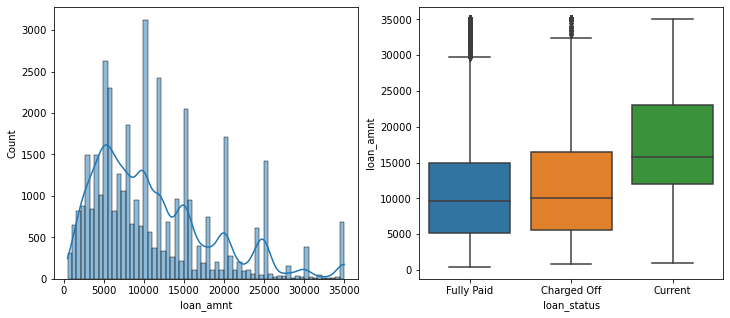

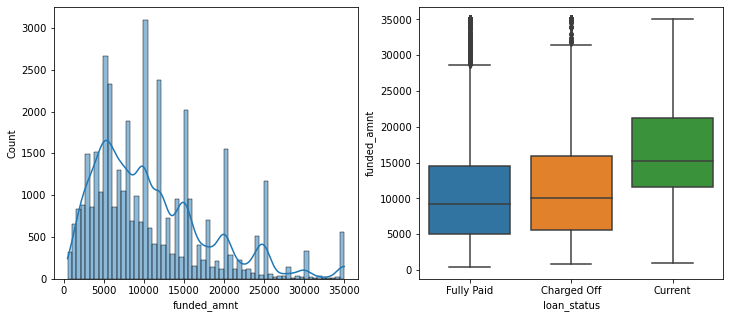

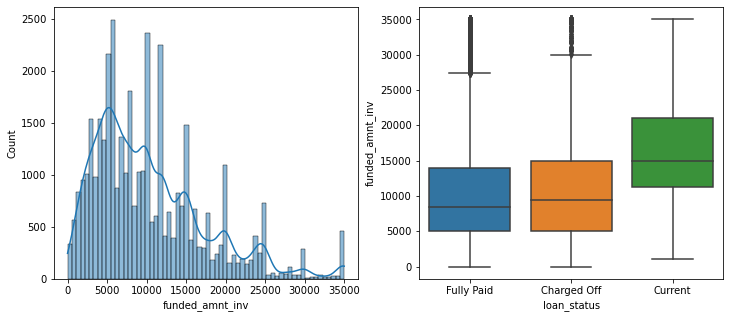

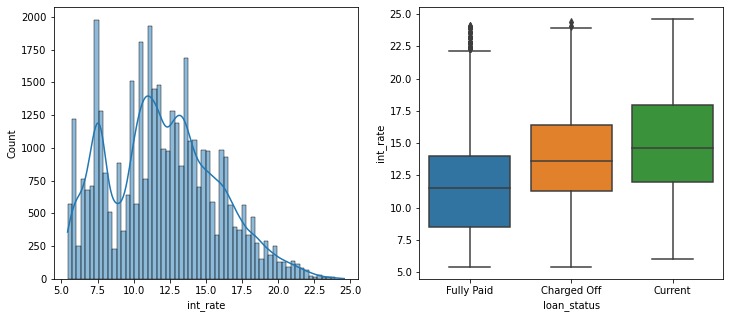

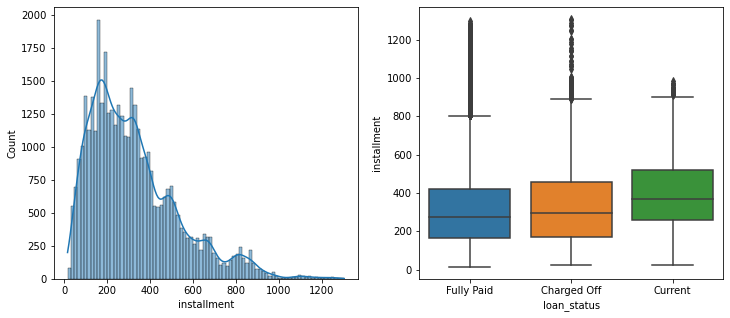

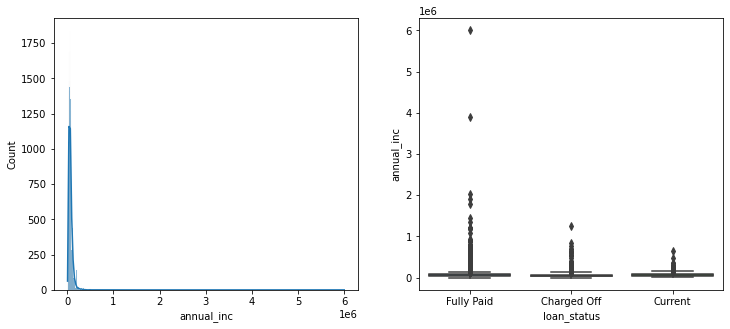

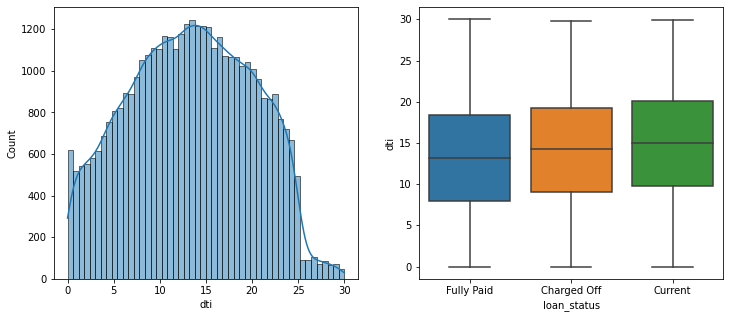

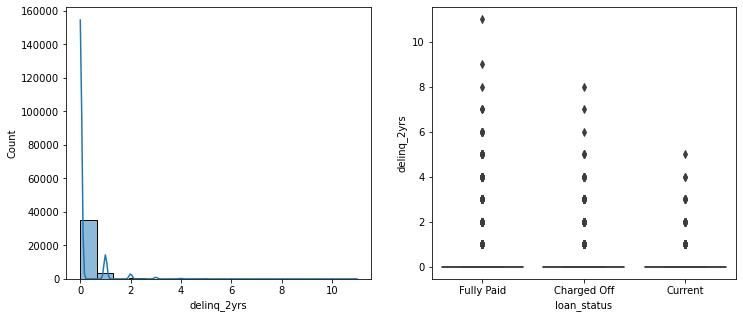

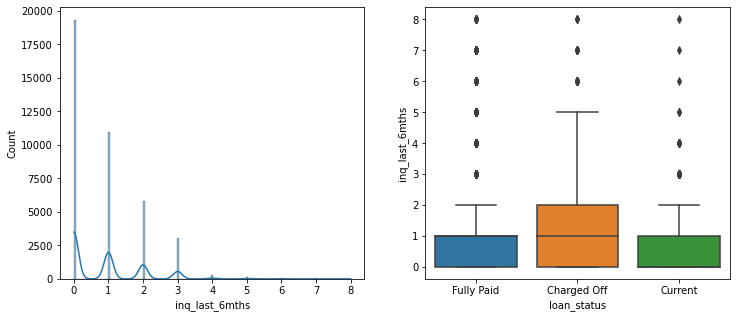

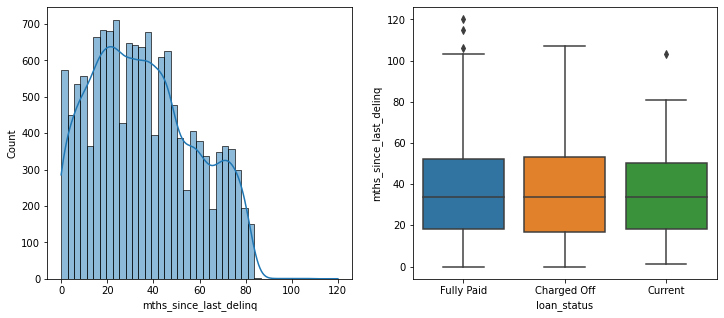

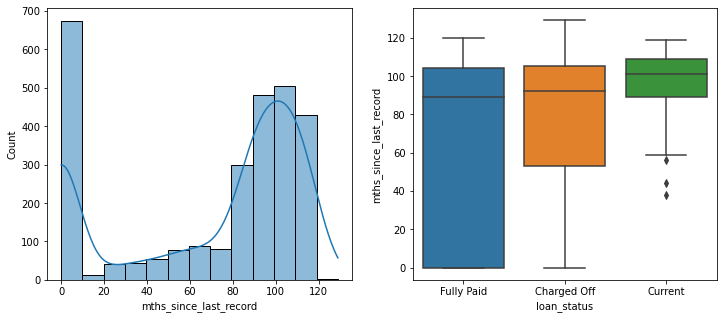

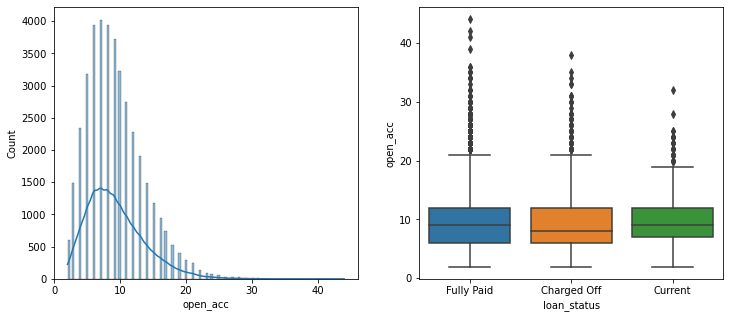

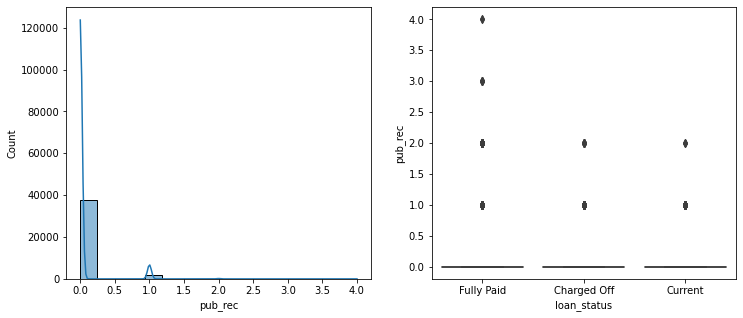

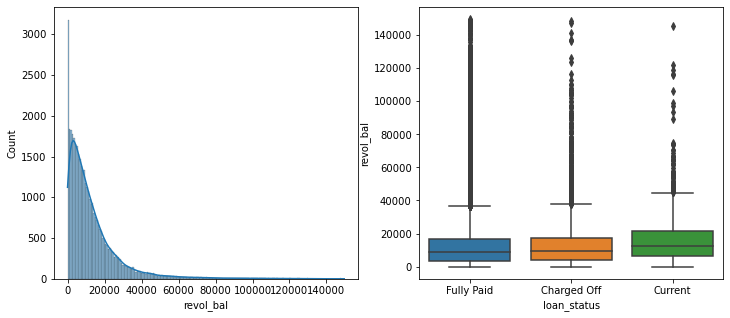

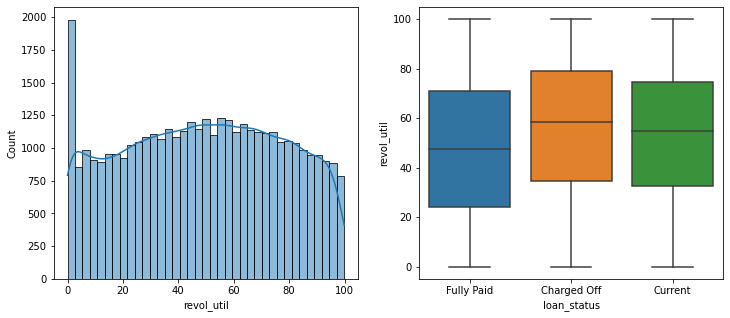

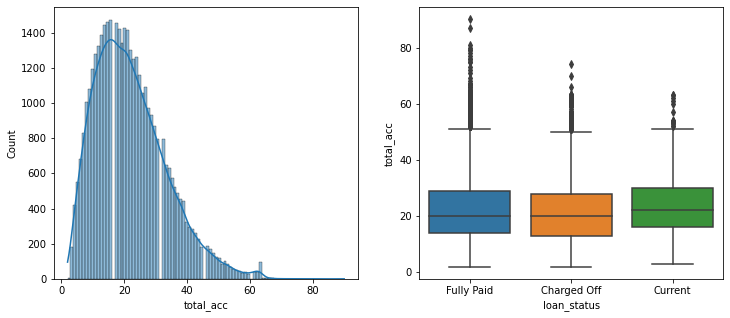

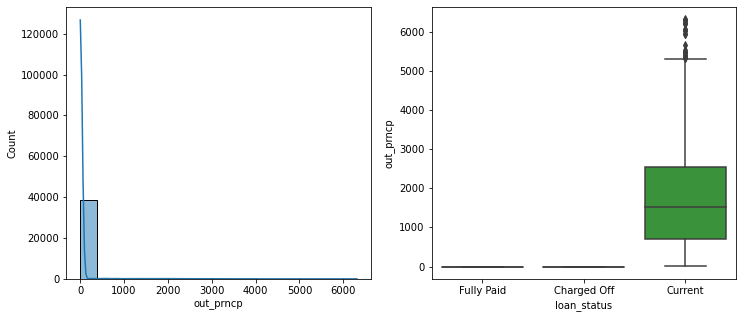

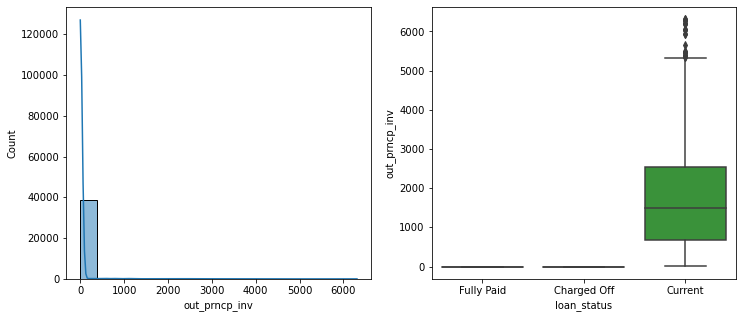

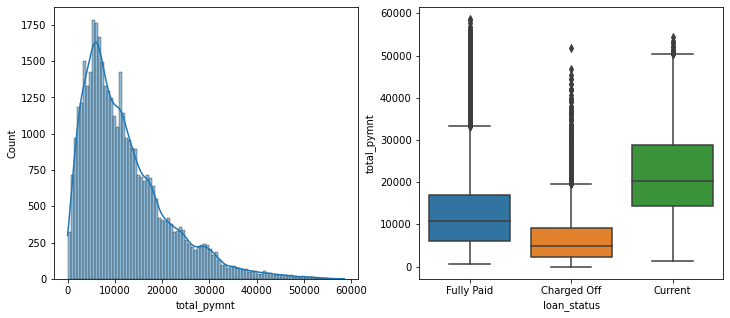

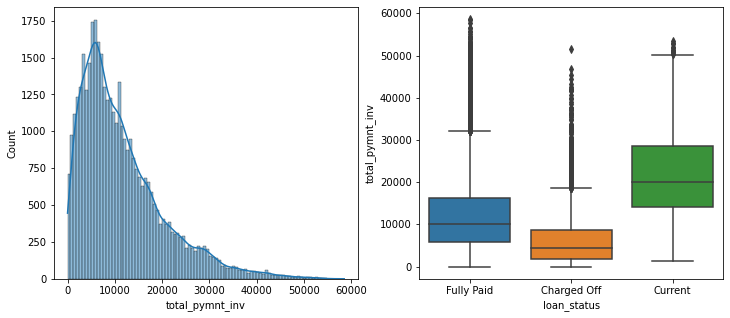

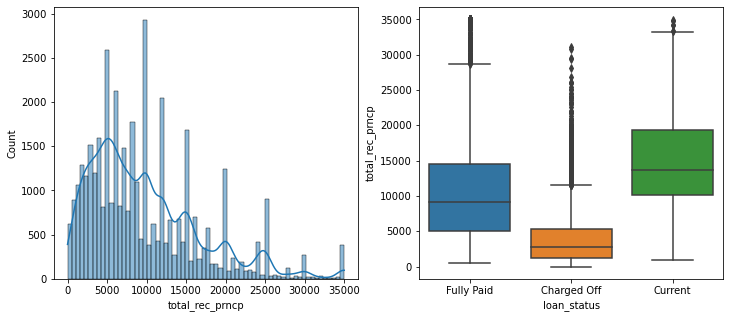

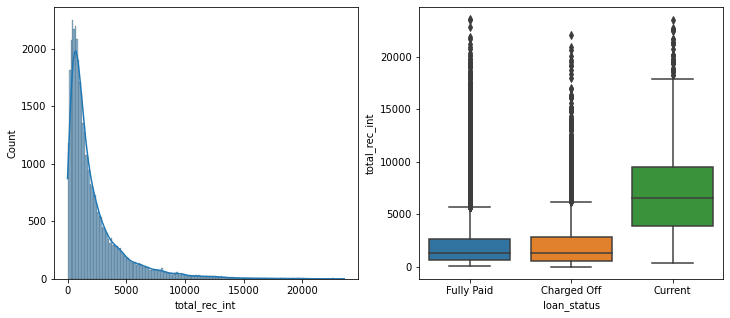

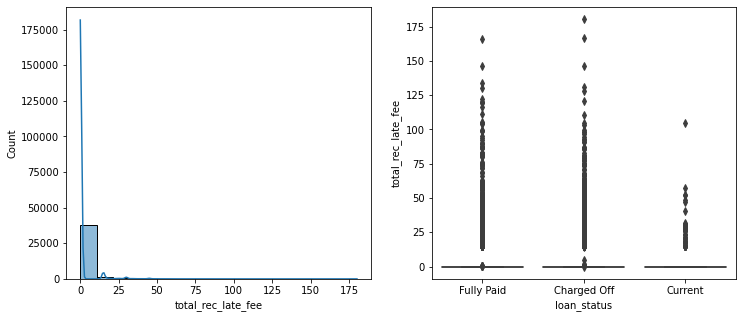

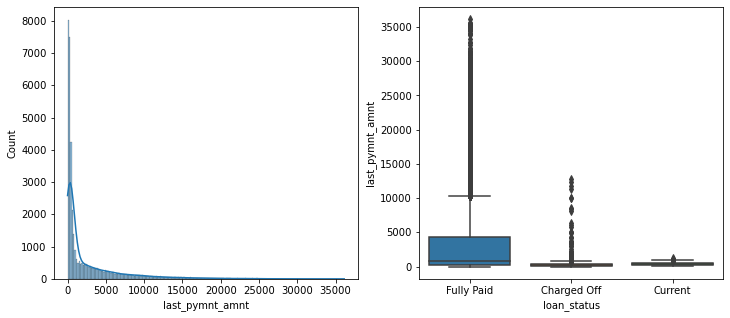

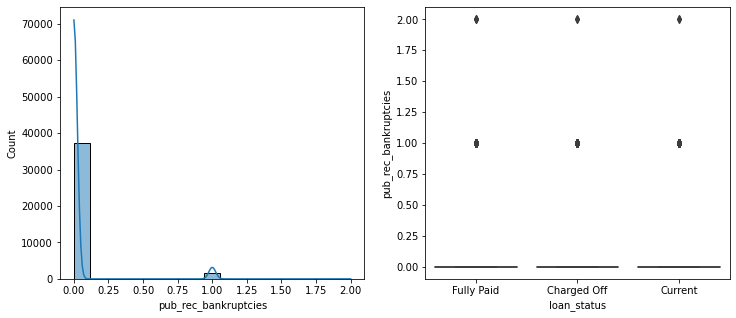

In [70]:
for i in cont_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[i], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x='loan_status',y=i,data=df)

Insights:

1. Int_rate: Charged off loans have on average higher interest rate than the fully paid loans
2. Inq_last_6mths: The Charged off loans have more inquiries compared to fully paid loans
3. revol_util: Revolving line utilization rate is higher for charges off loans
4. A lot of features are quite skewed including annual income, delinq_2yrs,pub_records, revol_bal,etc

#### Outlier Treatment

In [72]:
# Treating Outliers in annual income
# Imputing values higher than the 99th percentile to the 99th percentile value
income_99 =df['annual_inc'].quantile(0.99)
df['annual_inc_treated'] =df['annual_inc'].apply(lambda x: x if x<=income_99 else income_99 )

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc_treated'>

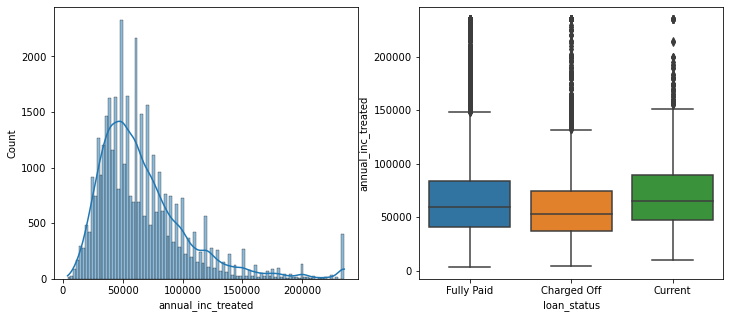

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['annual_inc_treated'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='annual_inc_treated',data=df)

### Feature Engineering

Deriving new features from the data as per the understanding

In [73]:
# Calculating months difference between issue date and last payment date
df['months_diff_last_payment_issue_dt']=round(((df['last_pymnt_d']-df['issue_d']).dt.days/365)*12,1)

# Calculating default loan completion date by adding term to the issue date
df['loan_completion_date'] =df.apply(lambda x: x.issue_d+pd.DateOffset(months=x.term), axis=1)

# Creating flag if the last payment amount was greater than the installment
df['last_payment_amount_flag'] =df['last_pymnt_amnt']>df['installment']

# Calculating the Installment as a percentage of Income
df['installment_income_prcnt'] =round((df['installment']/df['annual_inc_treated'])*100,2)

# Calculating if the user has paid late fee ever
df['total_rec_late_fee_flag'] =df['total_rec_late_fee'].apply(lambda x: 1 if x>0 else 0)

### Bivariate and Segmented Analysis

<AxesSubplot:>

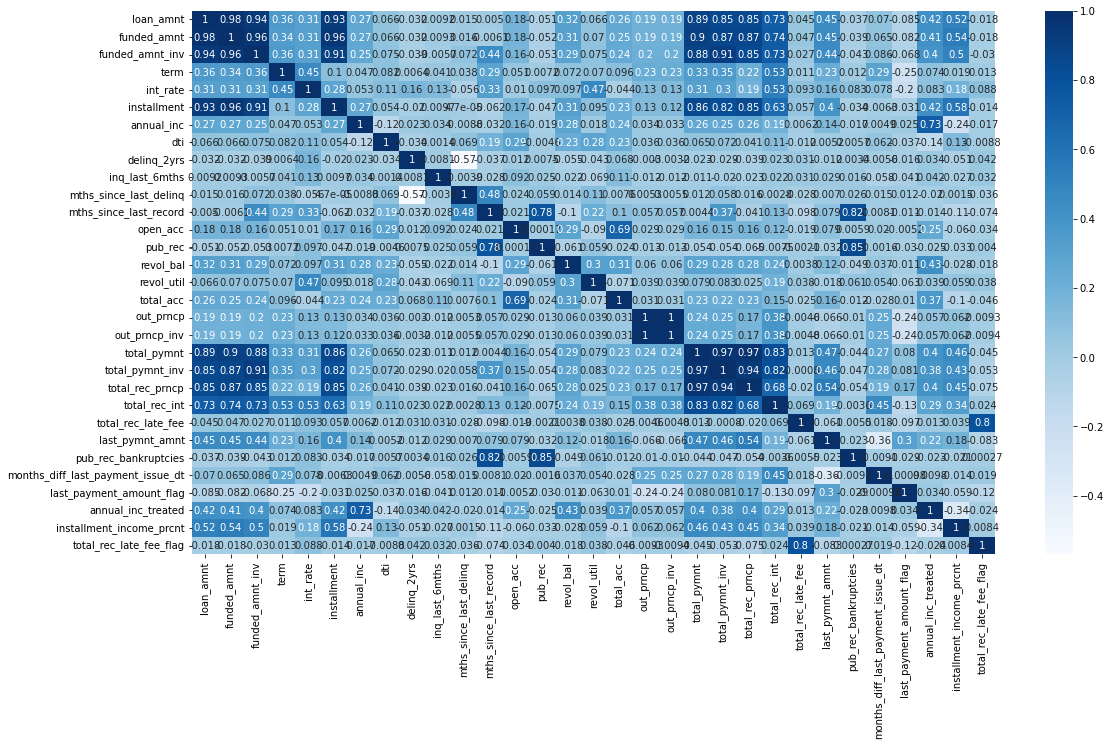

In [74]:
# Studying Correlation between features 

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [75]:
# Features having very high correlation

# loan amount- funded amount, funded amount_inv, total_payment, installment
# total_payment - total_payment_inv,total_rec_prncp
# out_prncp -out_prncp_inv

# Removing some highly correlated features conservatively
df.drop(columns =['funded_amnt', 'funded_amnt_inv','total_pymnt_inv','total_rec_prncp','out_prncp_inv'], inplace =True)

In [76]:
df.shape

(39717, 39)

#### Analyzing features created

<AxesSubplot:xlabel='last_payment_amount_flag'>

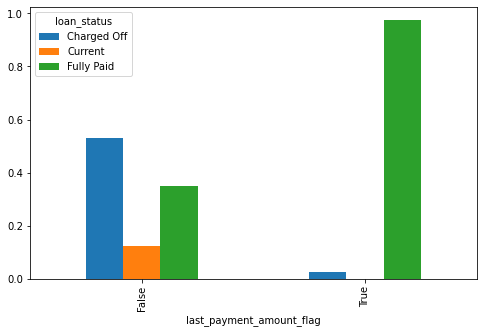

In [78]:
# Analyzing last payment flag

df.groupby(['last_payment_amount_flag'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(8,5))

# Insight: If the last paid amount is anytime higher than the installment, the customer has very less probability of Charging off

<AxesSubplot:xlabel='total_rec_late_fee_flag'>

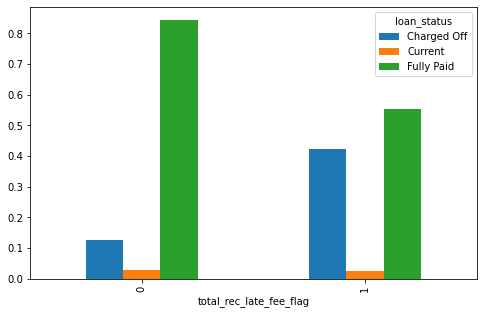

In [79]:
# Analyzing total_rec_late_fee_flag
df.groupby(['total_rec_late_fee_flag'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(8,5))

# Insight: If there has been any late fees, the chances of Charging off increases